# Data Exploration for Milestone 1
### Group CLR

For this project, we wish to showcase the magical world of chocolate. To do this, we will shed light on the elements that contribute to creating the perfect chocolate bar, be it the bean, the company, the flavour and so on. For this goal, we decided to evaluate mainly three publicly available datasets that were found on [Kaggle](https://www.kaggle.com/). All of the datasets contain 1000-2000 ratings of chocolate bars alongside some matedata on the latter. 


The first, and most promising, one was created by Manhattan Chocolate Society, Flavors of Cacao [Internet]. Available from: [http://flavorsofcacao.com/](http://flavorsofcacao.com/). The dataset was last updated three months ago and code for crawling the most up-to-date information from the website was published alongside the data ([script](https://www.kaggle.com/code/andrewmvd/chocolate-ratings-crawler)). As most datasets, the available data is USA/Canada centric, showing only chocolate bars produced by companies in the two countries. The website [http://flavorsofcacao.com/](http://flavorsofcacao.com/) appears very trustworthy and thorough. It contains the data that is available on the dataset plus lots of informative studies and surveys on chocolate that were conducted by the Manhattan Chocolate Society and might be nice to include to our website as well. 

The second and third are less up to date and contain fewer metadata fields. These were all retrieved from the same website, only 5 and 2 years before. For this reason, we decide to focus on the first.

## The data

The data contains information about different chocolate bars and includes 2733 reviews. The rating scale is defined as follows:

- 4.0 - 5.0 = Outstanding
- 3.5 - 3.9 = Highly Recommended
- 3.0 - 3.4 = Recommended
- 2.0 - 2.9 = Disappointing
- 1.0 - 1.9 = Unpleasant


The dataframes available have been downloaded and stored [here](./data/). What followa is a brief description of the fields in the two dataframes.

[Chocolate makers](data/chocolate_makers.csv):

- `COMPANY NAME`: Company that produces the chocolate bar.


- `CITY`: City where the company is based.


- `STATE/PROVINCE`: State or province where the company is based.


- `OWNER/MAKER`: Company owner(s).


- `COUNTRY`: Country where the company is based in.



[Chocolate ratings](data/chocolate_ratings.csv):

- `REF`: ID.


- `Company (Manufacturer)`: Company that produces the chocolate bar.


- `Company Location`: Country where the company is located.


- `Review Date`: Date of the review.


- `Country of Bean Origin`: Country where the beans where produced.


- `Specific Bean Origin or Bar Name`: Batch information of the beans.


- `Cocoa Percent`: Percentage of cocoa in the chocolate bar.


- `Ingredients`: Other relevant ingredients present.


- `Most Memorable Characteristics`: Reviewers most memorable taste experiences in the review.


- `Rating`: Chocolate rating.


In [138]:
import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [139]:
makers = pd.read_csv('data/chocolate_makers.csv')
ratings = pd.read_csv('data/chocolate_ratings.csv')

print(makers.columns, makers.shape)
print(ratings.columns, ratings.shape)

df = makers.merge(ratings, right_on='Company (Manufacturer)', left_on='COMPANY NAME', how='inner')
print(df.shape)

Index(['COMPANY NAME', 'CITY', 'STATE/PROVINCE', 'OWNER/MAKER', 'COUNTRY'], dtype='object') (373, 5)
Index(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object') (2530, 10)
(934, 15)


In [44]:
# Let's make use of pandas profiling
profile_makers = pp.ProfileReport(makers)
profile_makers.to_file(output_file="makers.html")

profile_ratings = pp.ProfileReport(ratings)
profile_ratings.to_file(output_file="ratings.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


In [46]:
# nans plus merge issues

makers.isnull().sum(axis = 0), ratings.isnull().sum(axis = 0), #df.isnull().sum(axis = 0)

(COMPANY NAME      0
 CITY              0
 STATE/PROVINCE    0
 OWNER/MAKER       3
 COUNTRY           0
 dtype: int64,
 REF                                  0
 Company (Manufacturer)               0
 Company Location                     0
 Review Date                          0
 Country of Bean Origin               0
 Specific Bean Origin or Bar Name     0
 Cocoa Percent                        0
 Ingredients                         87
 Most Memorable Characteristics       0
 Rating                               0
 dtype: int64)

In [49]:
df['COMPANY NAME'].nunique(), makers['COMPANY NAME'].nunique(), ratings['Company (Manufacturer)'].nunique()

(170, 373, 580)

Text(0.5, 1.0, 'Histogram of Cities distribution')

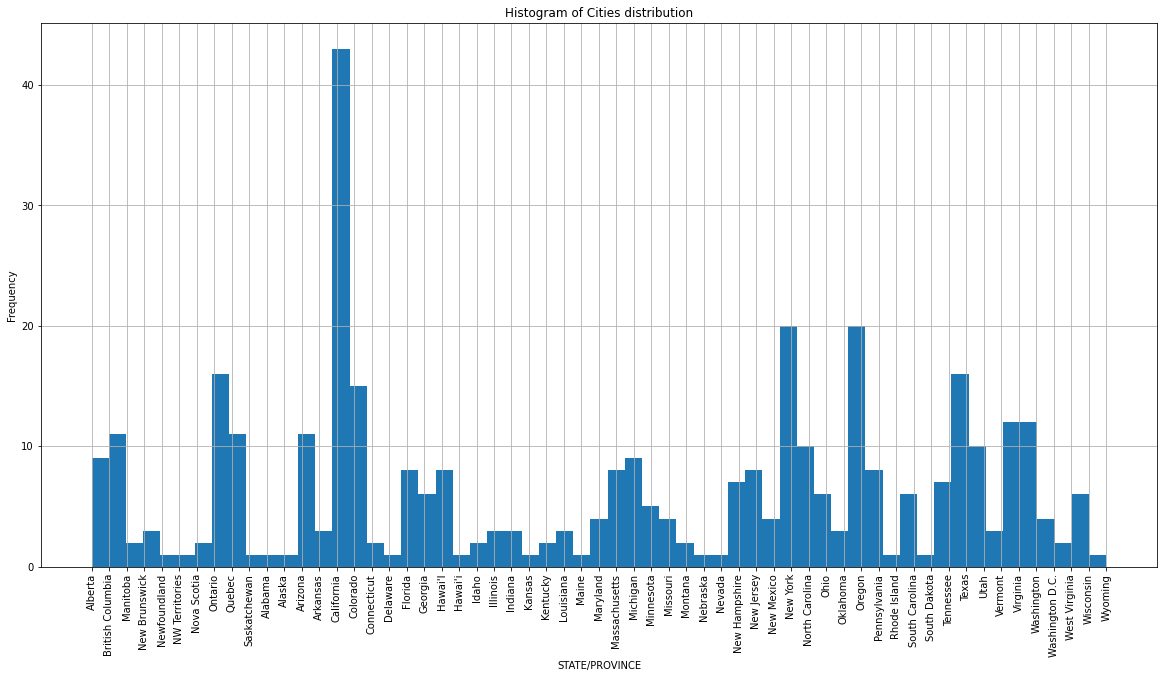

In [19]:
makers['STATE/PROVINCE'].hist(bins=makers['STATE/PROVINCE'].nunique(), figsize=(20,10))
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.xlabel('STATE/PROVINCE')
plt.title('Histogram of Cities distribution')


In [18]:
makers['COUNTRY'].value_counts()

US        316
Canada     57
Name: COUNTRY, dtype: int64

In [21]:
makers['OWNER/MAKER'].value_counts()

Seneca Klassen                               2
Joshua Parker                                2
Brad Churchill                               1
Blair Potts                                  1
Paul Picton                                  1
                                            ..
Steve DeVries                                1
Damaris Graves, Katelyn Fox                  1
Gila and Joel Dar                            1
Matt Armstrong, Damaris (Graves) Ronkanen    1
Erin and Jake Robertson                      1
Name: OWNER/MAKER, Length: 368, dtype: int64

In [51]:
makers['CITY'].value_counts()

New York            14
Portland            12
Montreal             7
Calgary              6
San Francisco        6
                    ..
Tampa Bay            1
Tarpon Springs       1
Athens               1
Anahola (Kaua'I)     1
Cody                 1
Name: CITY, Length: 266, dtype: int64

In [110]:
model_count=makers
ax2= px.treemap(model_count,path=['STATE/PROVINCE'],title="Location of the manufacturer:")
ax2= px.treemap(model_count,path=['CITY'],title="Location of the manufacturer:")
ax2.show()

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\plotly\express\_core.py:1575: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\plotly\express\_core.py:1575: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [23]:
#['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date', 
# 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 
# 'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics', 'Rating']

In [62]:
# company frequency + scatter rating

ratings['Company (Manufacturer)'].value_counts()

Soma                                   56
Fresco                                 39
Arete                                  32
Bonnat                                 30
A. Morin                               26
                                       ..
Rancho San Jacinto                      1
Raoul Boulanger                         1
Raw Cocoa                               1
Heirloom Cacao Preservation (Mindo)     1
Manifesto Cacao                         1
Name: Company (Manufacturer), Length: 580, dtype: int64

In [63]:
ratings.groupby('Company (Manufacturer)')['Rating'].mean().sort_values(ascending=False)

Company (Manufacturer)
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Matale                                  3.812500
Patric                                  3.791667
                                          ...   
Majani                                  2.000000
Love Bar                                2.000000
Callebaut                               1.875000
Machu Picchu Trading Co.                1.875000
Cote d' Or (Kraft)                      1.000000
Name: Rating, Length: 580, dtype: float64

In [131]:
model_count=ratings
ax2= px.treemap(model_count,path=['Company Location'],title="Location of the manufacturer:")
ax2.show()

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\plotly\express\_core.py:1575: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [83]:
production2bean = ratings[['Company Location', 'Country of Bean Origin']].value_counts().reset_index()[:80]
production2bean

,Company Location,Country of Bean Origin,0
0,U.S.A.,Dominican Republic,154
1,U.S.A.,Peru,115
2,U.S.A.,Venezuela,87
3,U.S.A.,Ecuador,86
4,U.S.A.,Madagascar,73
...,...,...,...
75,Belgium,Blend,7
76,Belgium,Peru,6
77,Scotland,Peru,6
78,U.K.,St. Lucia,6


In [85]:
# location to country of bean origin

from sklearn import preprocessing
import plotly.graph_objects as go


le = preprocessing.LabelEncoder()
le.fit(list(production2bean['Company Location']) + list(production2bean['Country of Bean Origin']))

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(le.classes_),
      color = "blue"
    ),
    link = dict(
      source = le.transform(production2bean['Company Location']), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = le.transform(production2bean['Country of Bean Origin']),
      value = production2bean[0]
  ))])

fig.update_layout(title_text="Sankey Diagram from Country of Manifacturing to Bean Origin", font_size=10)
fig.show()

In [91]:
# specific to country of bean

specific2bean = ratings[['Specific Bean Origin or Bar Name', 'Country of Bean Origin']].value_counts().reset_index()[:40]
specific2bean

,Specific Bean Origin or Bar Name,Country of Bean Origin,0
0,Madagascar,Madagascar,54
1,Ecuador,Ecuador,43
2,Peru,Peru,41
3,Dominican Republic,Dominican Republic,38
4,Chuao,Venezuela,28
5,Venezuela,Venezuela,21
6,Kokoa Kamili,Tanzania,20
7,Sambirano,Madagascar,17
8,Ghana,Ghana,17
9,Papua New Guinea,Papua New Guinea,17


In [92]:
le = preprocessing.LabelEncoder()
le.fit(list(specific2bean['Specific Bean Origin or Bar Name']) + list(specific2bean['Country of Bean Origin']))

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(le.classes_),
      color = "blue"
    ),
    link = dict(
      source = le.transform(specific2bean['Specific Bean Origin or Bar Name']), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = le.transform(specific2bean['Country of Bean Origin']),
      value = specific2bean[0]
  ))])

fig.update_layout(title_text="Sankey Diagram from Specific Bean Origin to Bean Origin", font_size=10)
fig.show()

Text(0.5, 1.0, 'Regression plot of ratings over the years')

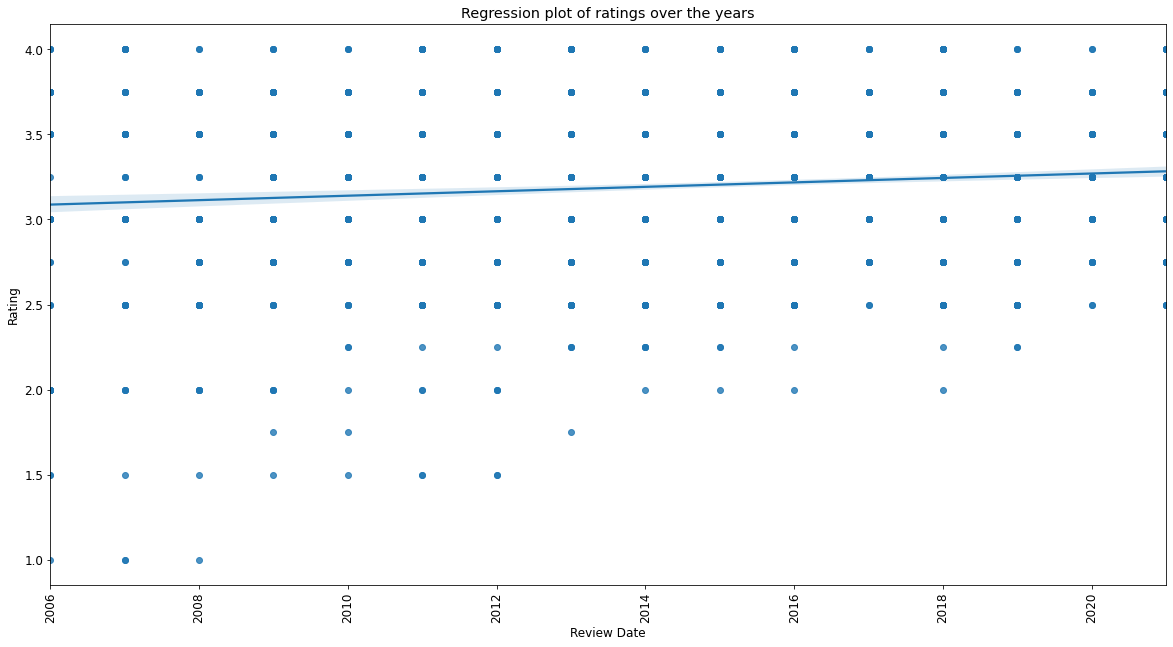

In [101]:
# review date to rating

fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.regplot(x='Review Date', y='Rating', data=ratings, ax=ax)
plt.ylabel('Rating')
plt.xticks(rotation = 90)
plt.xlabel('Review Date')
plt.title('Regression plot of ratings over the years')

In [105]:
ratings['Cocoa Percent Int'] = ratings['Cocoa Percent'].str[:2].astype(int)
ratings['Cocoa Percent Int']

0       76
1       76
2       76
3       68
4       72
        ..
2525    80
2526    75
2527    75
2528    70
2529    72
Name: Cocoa Percent Int, Length: 2530, dtype: int32

Text(0.5, 1.0, 'Regplot of ratings over chocolate percentage')

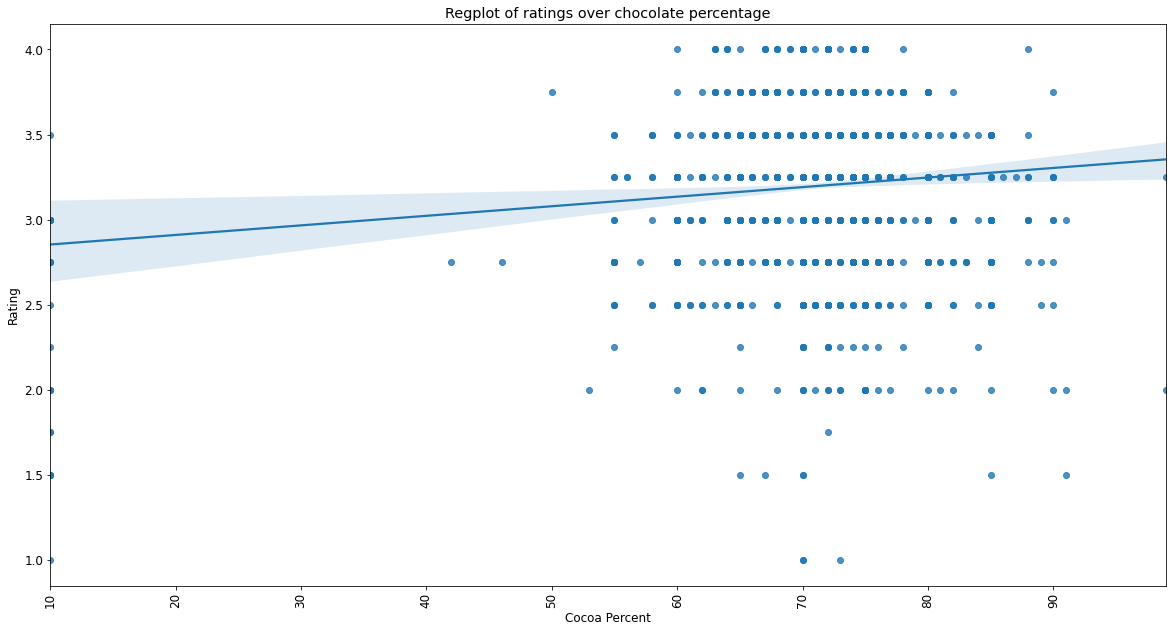

In [107]:
# cocoa percent to rating (line)

fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.regplot(x='Cocoa Percent Int', y='Rating', data=ratings, ax=ax)
plt.ylabel('Rating')
plt.xticks(rotation = 90)
plt.xlabel('Cocoa Percent')
plt.title('Regplot of ratings over chocolate percentage')

Text(0.5, 1.0, 'Regplot of ratings over number of ingredients')

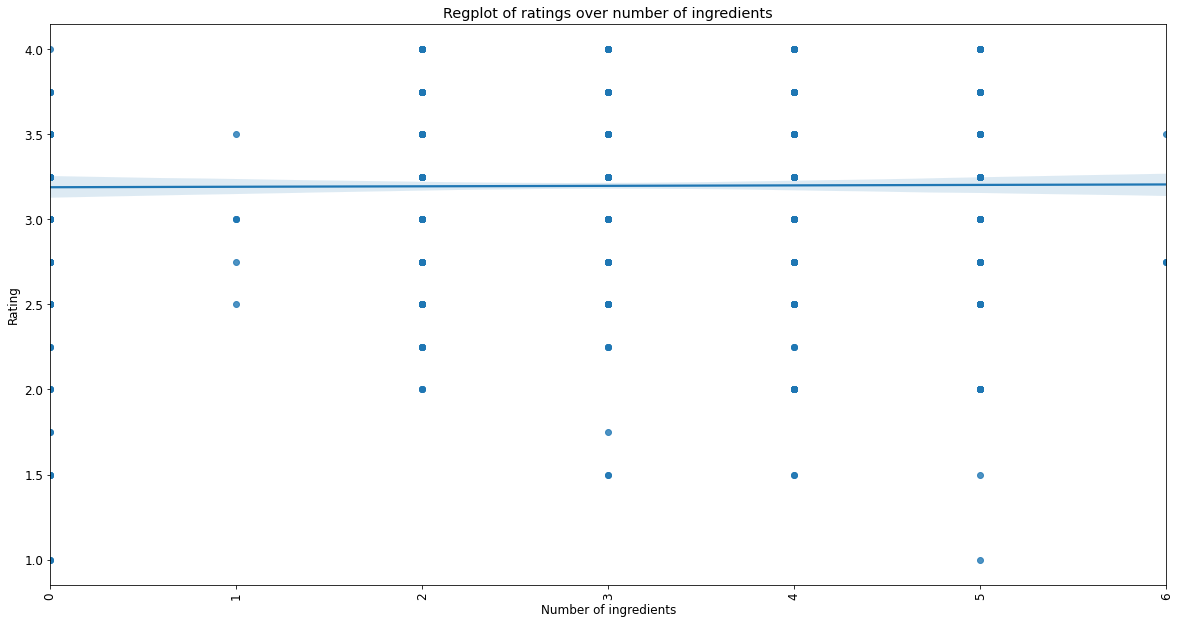

In [123]:
# num ingredients to rating + stats of ingredients

ratings['Ingredients Count'] = [int(i[0]) for i in ratings['Ingredients'].fillna('0 - ').str.split('-')]
ratings['Ingredients Count']

fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.regplot(x='Ingredients Count', y='Rating', data=ratings, ax=ax)
plt.ylabel('Rating')
plt.xticks(rotation = 90)
plt.xlabel('Number of ingredients')
plt.title('Regplot of ratings over number of ingredients')

In [127]:
# from http://flavorsofcacao.com/chocolate_database.html
abbrev2ingredient = {'B':'Beans', 'S':'Sugar', 'S*': 'Sweetener other than white cane or beet sugar', 'C':'Cocoa Butter', 
                    'V': 'Vanilla', 'L': 'Lecithin', 'Sa': 'Salt', '':''}

In [130]:
ratings['Ingredients List'] = [i[1].strip().split(',') for i in ratings['Ingredients'].fillna('0 - ').str.split('-')]
ratings_explode = ratings.explode('Ingredients List').reset_index()
ratings_explode['Ingredients List'] = ratings_explode['Ingredients List'].apply(lambda x: abbrev2ingredient[x])
ratings_explode['Ingredients List'].value_counts()

Beans                                            2443
Sugar                                            2360
Cocoa Butter                                     1668
Lecithin                                          493
Vanilla                                           353
                                                   87
Sweetener other than white cane or beet sugar      76
Salt                                               37
Name: Ingredients List, dtype: int64

In [140]:
# same for most memorable characteristics

ratings['Most Memorable Characteristics List'] = ratings['Most Memorable Characteristics'].fillna(',').str.split(', ')
ratings_explode = ratings.explode('Most Memorable Characteristics List').reset_index()
ratings_explode['Most Memorable Characteristics List'].value_counts()


sweet                   264
nutty                   259
cocoa                   242
roasty                  209
earthy                  187
                       ... 
leathery flavor           1
mellow but flavorful      1
ripe                      1
very smokey               1
mild nuts                 1
Name: Most Memorable Characteristics, Length: 1034, dtype: int64